### Rafael Augusto Gaseta França - 1421436
### Pedro Ferreira Alves Pinto - 1320981

### Sobre o DataSet

Existe uma api do proprio kaggle para download de seus datasets, entretanto é preciso configuracao de credencial, o que nao seria viavel dentro de um notebook.Por favor, faça o download do dataset e extraia na pasta do projeto.

# https://www.kaggle.com/rounakbanik/the-movies-dataset/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import re
import math

%matplotlib inline

### Funções gerais

In [2]:
def apply_money_clear( cell ):
    if cell == "" or cell == "False" or cell == "false":
        return 0
    else:
        return cell

In [3]:
def apply_data( cell ):
    if cell == None:
        return np.NaN
        
    if type(cell) != str:
        return np.NaN
    
    if re.search('\d{4}-\d{2}-\d{2}', cell ) == None:
        return np.NaN
    
    return cell

In [4]:
def apply_toLog( value ):
    if value < 10:
        value = 10
    return math.log10( value )

In [5]:
def style_highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #81ff77' if v else '' for v in is_max]

def style_highlight_min(s):
    is_min = s == s.min()
    return ['background-color: #ffc97b' if v else '' for v in is_min]

def style_highlight_min_max(s):
    minList = style_highlight_min( s )
    maxList = style_highlight_max( s )
    
    minMaxList = ['' for _ in range(len(maxList)) ]
    
    for i in range(len(minMaxList)):
        if maxList[i] == '':
            if minList[i] != '':
                # Eh Minimo
                minMaxList[i] = 'background-color: #ffc97b'
                
        else:
            # Eh Maximo
            minMaxList[i] = 'background-color: #81ff77'

    return minMaxList 

# Carga e Tratamento inicial dos dados

In [6]:
def convert_clearJSONString( jsonString ):
    jsonString = jsonString.replace("\\", "\\\\")
    jsonString = jsonString.replace("\"", "\'")
    jsonString = re.sub( r"({ *)'" , r'\1"' ,  jsonString )
    jsonString = re.sub( r"'( *})" , r'"\1' ,  jsonString )
    jsonString = re.sub( r"'( *[:,] *)'" , r'"\1"' ,  jsonString )
    jsonString = re.sub( r"'( *: *\d+)" , r'"\1' ,  jsonString )
    jsonString = re.sub( r"(\d+ *, *)'" , r'\1"' ,  jsonString )
    jsonObj = json.loads(jsonString)
    return jsonObj

def apply_filter_validJSON_list( value ):      
    if value == None or type(value) != str or re.search('^\[.*\]$', value ) == None:
        return json.loads("[]")
    else:
        value = convert_clearJSONString( value )
        return value
    
def apply_filter_language( value ):
    if value == None:
        return "unknown"
    
    elif type(value) != str:
        return "unknown"
    
    try: 
        float(value)
        return "unknown"
    except ValueError:
        return value
    
def apply_filter_countryList( value ):
    if value == None:
        return None
    
    elif type(value) != str:
        return None
    
    elif re.search('^\[.*\]$', value ) != None:
        dictList = convert_clearJSONString( value )
        countryList = list()
        
        for countryDict in dictList:
            for key , value in countryDict.items():
                if key == 'iso_3166_1':
                    countryList.append( value )
                                
        return countryList
        
    else:
        return None
    

In [7]:
df_movies_metadata = pd.read_csv('movies_metadata.csv' , low_memory=False ).drop_duplicates()

In [8]:
# Processando o JSON da coluna genres
df_movies_metadata['genres'] = df_movies_metadata['genres'].apply( apply_filter_validJSON_list )

# Processando o JSON da coluna production_companies
df_movies_metadata['production_companies'] = df_movies_metadata['production_companies'].apply( apply_filter_validJSON_list )

# Processando a coluna original_language
df_movies_metadata['original_language'] = df_movies_metadata['original_language'].apply( apply_filter_language )

# Processando o JSON na coluna  production_countries
df_movies_metadata['production_countries'] = df_movies_metadata['production_countries'].apply( apply_filter_countryList )

# Clean budget and revenue columns and create profit column
df_movies_metadata['budget'] = df_movies_metadata['budget'].apply(apply_money_clear)
df_movies_metadata['budget'] = df_movies_metadata['budget'].apply(pd.to_numeric , errors='coerce').fillna(0)

df_movies_metadata['revenue'] = df_movies_metadata['revenue'].apply(apply_money_clear )
df_movies_metadata['revenue'] = df_movies_metadata['revenue'].apply(pd.to_numeric , errors='coerce').fillna(0)

df_movies_metadata['profit'] = df_movies_metadata['revenue'] - df_movies_metadata['budget']

# Convertendo String em Data
df_movies_metadata['release_date'] = df_movies_metadata['release_date'].apply( apply_data )
df_movies_metadata['release_date'] = pd.to_datetime( df_movies_metadata['release_date'] )



In [9]:
df_movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,profit
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,343554033.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,197797249.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,65452156.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,76578911.0
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,127436818.0
6,False,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,-58000000.0
7,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,0.0
8,False,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,29350171.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,294194034.0


# 1) Gêneros mais lucrativos nos últimos anos

In [10]:
def generateGenreDataFrame( movies_dataframe , fullInfo = True , yearWindow = 1, yearOffset = 0 ):
    profitByGenreData = list()

    for index, row in movies_dataframe.iterrows():
        naRow = row.isna()

        if row['budget'] < 1:
            continue

        if row['revenue'] < 1:
            continue

        if naRow['release_date'] == True:
            continue

        # Dados a coletar
        profit = row['profit']
        title = row['title']
        releaseDate = row['release_date']

        for genre in row['genres']:
            genreName = genre.get("name")
            if genreName != None:
                dataDict = dict()
                if fullInfo == True:
                    dataDict['title'] = title
                    dataDict['original_language'] = row['original_language']
                    
                # Info needed for group operations
                dataDict['genre'] = genreName
                dataDict['profit'] = profit
                dataDict['year'] = ( int( (releaseDate.year - yearOffset ) / yearWindow ) * yearWindow ) + yearOffset
                profitByGenreData.append( dataDict )

    # build dataframe
    genreDataFrame = pd.DataFrame(profitByGenreData)
    genreDataFrame.fillna( 0 , inplace = True )  
    
    return genreDataFrame
    

In [11]:
def generateProfitByGenreData( movies_dataframe , yearWindow , yearOffset = 8 ):
    # build dataframe
    profitByGenre = generateGenreDataFrame( movies_dataframe , False , yearWindow , yearOffset )
    
    # build grouped dataframe
    profitByGenre = profitByGenre.groupby(  ['year','genre'] ).profit.agg(['min','max','mean','median','sum','count']).reset_index()
    
    return profitByGenre

In [78]:
def plot_profitByGenre( dataFrame , genreList , xcol , ycol , title , lineThickness = 2 ):
    plt.figure(figsize=(15,8))

    linestyles = [ ('-',1.0) , ('--',1.2) , ('-.',1.2) , (':',1.5)  ]

    linestyleIdx = 0
    counter = 0
    for genre in genreList:
        plt.plot( xcol,
                 ycol,
                 data=dataFrame[ dataFrame.genre == genre],
                 linewidth= linestyles[ linestyleIdx ][1] * lineThickness,
                 linestyle = linestyles[ linestyleIdx ][0],
                 label=genre)

        if counter > 4:
            linestyleIdx += 1
            counter = 0

        counter += 1
        
    plt.title(title , fontsize=20)
    plt.xlabel("Year")
    plt.ylabel("Profit")
    
    ax = plt.gca()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

    plt.legend()

### Plot 1 - Dados inalterados

In [13]:
# Tentativa 1 - Mantendo todos os anos
df_profitByGenre_grouped = generateProfitByGenreData( df_movies_metadata , 1 )
list_movies_metadata_genres = list( df_profitByGenre_grouped.genre.unique() )
df_profitByGenre_grouped.head()

,year,genre,min,max,mean,median,sum,count
0,1915,Drama,120054.0,10900000.0,5510027.0,5510027.0,11020054.0,2
1,1915,History,10900000.0,10900000.0,10900000.0,10900000.0,10900000.0,1
2,1915,War,10900000.0,10900000.0,10900000.0,10900000.0,10900000.0,1
3,1916,Action,7800000.0,7800000.0,7800000.0,7800000.0,7800000.0,1
4,1916,Adventure,7800000.0,7800000.0,7800000.0,7800000.0,7800000.0,1


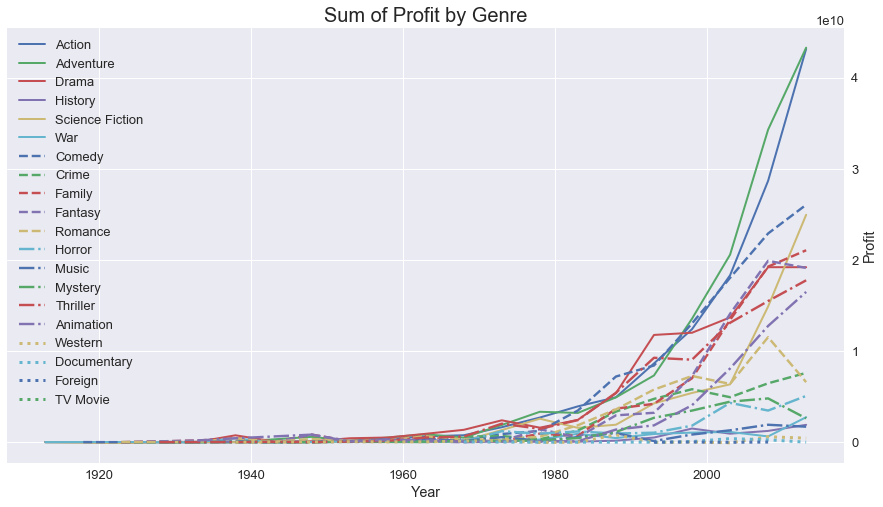

In [79]:
plot_profitByGenre( df_profitByGenre_grouped , list_movies_metadata_genres , 'year' , 'sum' , 'Sum of Profit by Genre' , 2 )

Muito confuso para analisar, vamos tentar melhorar isso.

### Plot 2 - Agrupando de 5 em 5 anos

In [15]:
# Tentativa 2 - De 5 em 5 anos
df_profitByGenre_grouped = generateProfitByGenreData( df_movies_metadata , 5 )
list_movies_metadata_genres = list( df_profitByGenre_grouped.genre.unique() )
df_profitByGenre_grouped.head()

,year,genre,min,max,mean,median,sum,count
0,1913,Action,7800000.0,7800000.0,7.800000e+06,7800000.0,7800000.0,1
1,1913,Adventure,7800000.0,7800000.0,7.800000e+06,7800000.0,7800000.0,1
2,1913,Drama,120054.0,10900000.0,6.273351e+06,7800000.0,18820054.0,3
3,1913,History,10900000.0,10900000.0,1.090000e+07,10900000.0,10900000.0,1
4,1913,Science Fiction,7800000.0,7800000.0,7.800000e+06,7800000.0,7800000.0,1


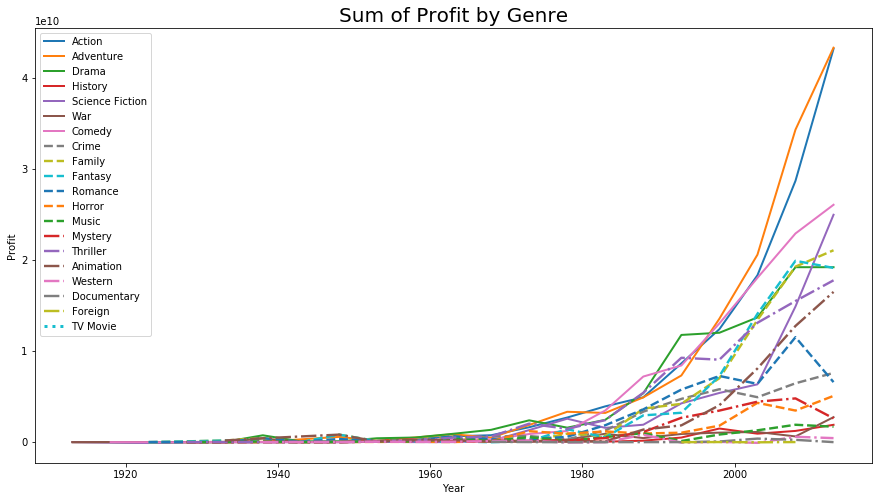

In [16]:
plot_profitByGenre( df_profitByGenre_grouped , list_movies_metadata_genres , 'year' , 'sum' , 'Sum of Profit by Genre' , 2 )

### 1.1) Análise Parcial

Como montante total de lucro, os gênero de "action" e "adventure" vem se destacando nos últimos anos, seguidos de "Comedy". 
Aparentemente "Science Fiction" está em rápido crescimento, podendo subir de posição nos próximos anos.

Já o gênero "Romance" aparentemente está resultando num grupo menor.

Vale ressaltar que este é o somatório do lucro de todos os filmes do gênero, ou seja, a análise está fortemente influênciada pela quantidade de filmes produzidos.

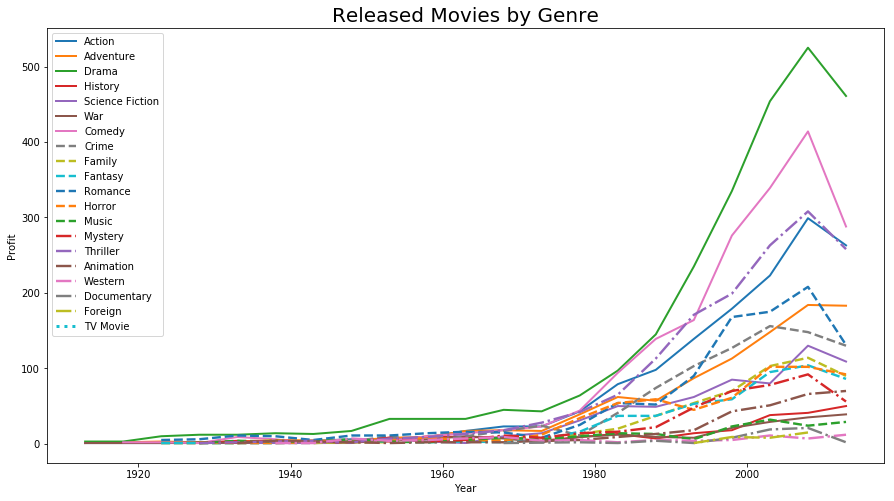

In [17]:
plot_profitByGenre( df_profitByGenre_grouped , list_movies_metadata_genres , 'year' , 'count' , 'Released Movies by Genre' ,  2 )

Mesmo sem um montante significativo, foram produzidos muitos filmes dos gêneros "Drama" e "Comedy". "Action" e "Adventure" aparecem logo em seguida, reforçando a ideia de que o montante pode ser pela quantidade de filmes, não pelo lucro individual de cada um deles.

Vamos analisar agora o lucro médio.

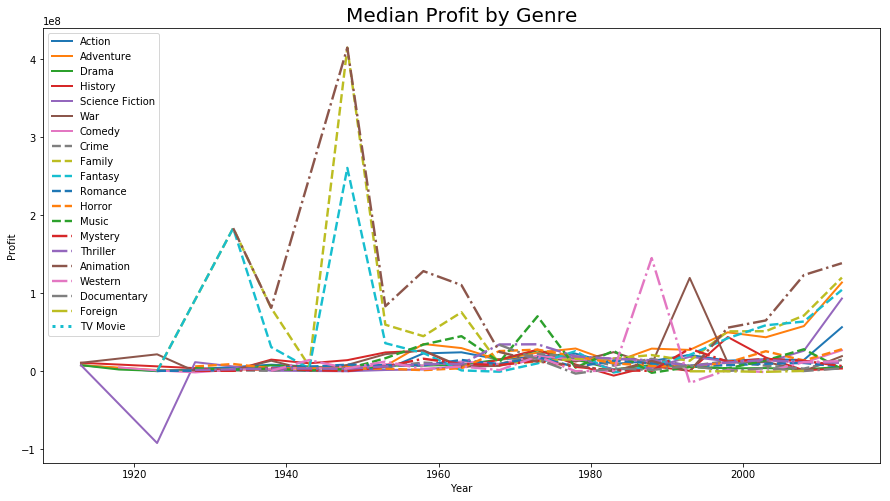

In [18]:
plot_profitByGenre( df_profitByGenre_grouped , list_movies_metadata_genres , 'year' , 'median' , 'Median Profit by Genre' , 2 )

### 1.2) Análise Parcial

Quando consideramos o lucro médio dos filmes, o cenário é outro. Filmes do gênero "adventure" ainda mantem sua posição como lucrativo, mas o gênero "Action" em média não possui lucros altos. "Science Fiction" ganhou posições e os gêneros "Fantasy" e "Family" surgiram com alto lucro médio.

Em primeiro lugar surge o gênero "Animation". É interessante observar a sua ascenção rescente começou no final da década de 90, o que coincide com o inicio da animação renderizada, marcado por Toy Story ( 1996 ).

Outro fator interessante é um pico mais alto por voltada década de 50. Vamos tentar analisar o motivo.

In [19]:
# Encontrando os filmes responsaveis por tal lucro
df_moviesByGenre_titles = generateGenreDataFrame( df_movies_metadata , True )
df_moviesByGenre_titles = df_moviesByGenre_titles[ (df_moviesByGenre_titles.year >= 1940) 
                           & (df_moviesByGenre_titles.year <= 1960)
                           & (df_moviesByGenre_titles.genre == "Animation" ) ]
df_moviesByGenre_titles = df_moviesByGenre_titles.sort_values( by="profit" , ascending=False )
df_moviesByGenre_titles.head(10)

,genre,original_language,profit,title,year
945,Animation,en,569000000.0,Alice in Wonderland,1951
1926,Animation,en,266589150.0,Bambi,1942
929,Animation,en,260691415.0,Cinderella,1950
2005,Animation,en,83404651.0,Peter Pan,1953
613,Animation,en,81700000.0,Pinocchio,1940
1202,Animation,en,81040000.0,Fantasia,1940
2027,Animation,en,45000000.0,Sleeping Beauty,1959
937,Animation,en,788000.0,Dumbo,1941


### 1) Conclusão

Nos últimos anos, os gêneros "Action" e "Adventure" geraram o maior lucro como um todo. Os gêneros "Comedy" e "Drama", mesmo possuindo a maior quantidade de filmes lançados nos últimos anos, não deram tanto lucro quanto os dois gêneros citados anteriormente. 

Ao considerarmos o lucro médio por filme de cada gênero, "Animation" é o que gera mais lucro. Com "Fantasy", "Adventure", "Famility" e "Science Fiction" abaixo de "Animation", mas próximos entre si.

Um fato interessante sobre o gênero "Animation" é que seu lucro médio passou a crescer consistentemente desde a o final da década de 90, quando lançou Toy Story, que inaugurou a massificação das animações 3D.
Antes disso, na década de 50 houve um outro pico no lucro médio das animações. Ao analisar os dados encontramos alguns clássicos lançados nessa época, como: 

Alice in Wonderland, 
Bambi, 
Cinderella, 
Peter Pan, 
e Pinocchio.




# 2) Produtoras mais lucrativas nos últimos anos

In [20]:
def generateProfitByProducersData( movies_dataframe , yearWindow , yearOffset = 8 ):
    profitByProducerData = list()

    for index, row in movies_dataframe.iterrows():
        naRow = row.isna()

        if row['budget'] < 1:
            continue

        if row['revenue'] < 1:
            continue

        if naRow['release_date'] == True:
            continue

        # Dados a coletar
        profit = row['profit']
        title = row['title']
        releaseDate = row['release_date']

        for producer in row['production_companies']:
            producerName = producer.get("name")
            if producerName != None:
                dataDict = dict()
                dataDict['title'] = title
                dataDict['producer'] = producerName
                dataDict['profit'] = profit
                dataDict['year'] = ( int( (releaseDate.year - yearOffset ) / yearWindow ) * yearWindow ) + yearOffset
                profitByProducerData.append( dataDict )

    # build dataframe
    profitByProducer = pd.DataFrame(profitByProducerData)
    profitByProducer.fillna( 0 , inplace = True )
    
    # build grouped dataframe
    profitByProducer = profitByProducer.groupby(  ['year','producer'] ).profit.agg(['min','max','mean','median','sum','count']).reset_index()
    
    return profitByProducer

In [21]:
def plot_profitByProducer( dataFrame , genreList , xcol , ycol , title , lineThickness = 2 ):
    plt.figure(figsize=(15,8))

    linestyles = [ ('-',1.0) , ('--',1.2) , ('-.',1.2) , (':',1.5)  ]

    linestyleIdx = 0
    counter = 0
    for genre in genreList:
        plt.plot( xcol,
                 ycol,
                 data=dataFrame[ dataFrame.genre == genre],
                 linewidth= linestyles[ linestyleIdx ][1] * lineThickness,
                 linestyle = linestyles[ linestyleIdx ][0],
                 label=genre)

        if counter > 5:
            linestyleIdx += 1
            counter = 0

        counter += 1
        
    plt.title(title , fontsize=20)
    plt.xlabel("Year")
    plt.ylabel("Profit")

    plt.legend()

In [22]:
# Organizando o DataSet para das produtoras
df_profitByProducer_grouped = generateProfitByProducersData( df_movies_metadata , 1 , 0 )
df_profitByProducer_grouped.sort_values( by='sum' , ascending=False)
list_movies_metadata_producers = list( df_profitByProducer_grouped.producer.unique() )

print( len(list_movies_metadata_producers) )
df_profitByProducer_grouped.head()

5437


,year,producer,min,max,mean,median,sum,count
0,1915,Epoch Film Co.,10900000.0,10900000.0,10900000.0,10900000.0,10900000.0,1
1,1915,Jesse L. Lasky Feature Play Company,120054.0,120054.0,120054.0,120054.0,120054.0,1
2,1916,The Universal Film Mfg. Co.,7800000.0,7800000.0,7800000.0,7800000.0,7800000.0,1
3,1918,Mabel Normand Feature Film Company,7750000.0,7750000.0,7750000.0,7750000.0,7750000.0,1
4,1921,Charles Chaplin Productions,2250000.0,2250000.0,2250000.0,2250000.0,2250000.0,1


### Obs: Muitas produtoras diferentes, não é possível visualizar da mesma maneira que fizemos com os gêneros

### Decisão: Analisar, para os ultimos 18 anos, as 5 produtoras que mais lucraram

In [23]:
def generateProducerRank( df_profitByProducer_grouped , startYear , endYear , topRank = 5 ):
    flag = False
    df_producerRanks = None

    # Estatisticas de quantas vezes cada produtora apareceu em cada posicao
    df_producerRanksStats = dict()
    for producer in df_profitByProducer_grouped.producer.unique():
        producerStats = dict()
        df_producerRanksStats[ producer ] = producerStats
        producerStats['producer'] = producer
        for rank in range( topRank ):
            producerStats[rank+1] = 0

    # coletando dados
    for year in range(startYear,endYear+1):
        df_thisYear = df_profitByProducer_grouped[ df_profitByProducer_grouped.year == year ]
        df_thisYear = df_thisYear[["producer","sum"]]
        df_thisYear = df_thisYear.sort_values( by="sum" , ascending=False ).head( topRank )
        df_thisYear = df_thisYear.reset_index().drop(['index'], axis=1)

        # Atualiza Stats
        for index, row in df_thisYear.iterrows():
            producerName = row["producer"]
            df_producerRanksStats[producerName][index+1] += 1

        # Merge no dataframe geral
        df_thisYear.columns = [ str(year)+"_producer" , str(year)+"_profit"]

        if flag == False:
            df_producerRanks = df_thisYear
            flag = True
        else:
            df_producerRanks = pd.merge(df_producerRanks, df_thisYear, left_index = True , right_index = True)
            
    # Constroi o DataFrame dos stats de ranks
    producerRankStatsList = list()
    for producerRankData in df_producerRanksStats.values():
        totalRank = 0
        for i in range( topRank ):
            totalRank += producerRankData[i+1]
            
        if totalRank > 0:
            producerRankData['total'] = totalRank
            producerRankStatsList.append( producerRankData )

    df_producerRanksStats = pd.DataFrame( producerRankStatsList )

    # Retornando valores     
    return df_producerRanks , df_producerRanksStats


In [24]:
df_producerRanks , df_producerRanks_stats = generateProducerRank( df_profitByProducer_grouped , 2000 , 2017 , topRank = 5 )

### Tabela com rank de produtoras que mais lucraram por ano

In [25]:
df_producerRanks

,2000_producer,2000_profit,2001_producer,2001_profit,2002_producer,2002_profit,2003_producer,2003_profit,2004_producer,2004_profit,...,2013_producer,2013_profit,2014_producer,2014_profit,2015_producer,2015_profit,2016_producer,2016_profit,2017_producer,2017_profit
0,DreamWorks SKG,1.249662e+09,Universal Pictures,1.612333e+09,New Line Cinema,1.462311e+09,Warner Bros.,1.859059e+09,DreamWorks SKG,1.776509e+09,...,Walt Disney Pictures,2.041270e+09,TSG Entertainment,2.715769e+09,Universal Pictures,3.347217e+09,Walt Disney Pictures,4.874193e+09,Walt Disney Pictures,2.505665e+09
1,Universal Pictures,9.256821e+08,Warner Bros.,1.381353e+09,Columbia Pictures,1.233933e+09,New Line Cinema,1.441813e+09,Warner Bros.,1.674163e+09,...,Universal Pictures,2.034423e+09,Warner Bros.,2.386201e+09,Fuji Television Network,2.785574e+09,Universal Pictures,3.016210e+09,Universal Pictures,1.769505e+09
2,Twentieth Century Fox Film Corporation,9.012156e+08,New Line Cinema,1.058797e+09,Warner Bros.,1.050165e+09,Universal Pictures,1.410030e+09,Twentieth Century Fox Film Corporation,1.596342e+09,...,Warner Bros.,1.660857e+09,Paramount Pictures,2.129483e+09,Dentsu,2.785574e+09,Twentieth Century Fox Film Corporation,2.247506e+09,Warner Bros.,1.737654e+09
3,Paramount Pictures,7.970592e+08,DreamWorks SKG,8.787421e+08,WingNut Films,8.472874e+08,WingNut Films,1.024889e+09,Pacific Data Images (PDI),1.062114e+09,...,Paramount Pictures,1.639567e+09,Revolution Sun Studios,2.119874e+09,Bad Robot,2.355554e+09,Warner Bros.,2.187126e+09,One Race Films,1.249912e+09
4,Walt Disney Pictures,5.216487e+08,Heyday Films,8.514756e+08,The Saul Zaentz Company,8.472874e+08,Village Roadshow Pictures,1.003125e+09,DreamWorks Animation,1.062114e+09,...,Marvel Studios,1.490011e+09,Twentieth Century Fox Film Corporation,1.973982e+09,Truenorth Productions,1.823224e+09,Walt Disney Studios Motion Pictures,1.773550e+09,Mandeville Films,1.102886e+09


### 2.1) Análise Parcial

Além das informações detalhadas dessa tabela, podemos perceber alguns nomes recorrentes como "Paramount Pictures", "Warner Bros." e "Walt Disney Pictures".

Vamos analisar agora a quantidade de vezes que esses nomes apareceram no ranking. 

In [26]:
df_temp = df_producerRanks_stats.sort_values( by="total" , ascending = False ).head(10)
df_temp.style.apply(style_highlight_min_max , subset=[1,2,3,4,5,"total"] )

,producer,1,2,3,4,5,total
1,Warner Bros.,2,7,3,2,2,16
2,Universal Pictures,2,5,2,2,1,12
5,Walt Disney Pictures,5,1,0,0,1,7
0,Paramount Pictures,1,0,3,2,0,6
3,Columbia Pictures,1,1,2,1,1,6
4,Twentieth Century Fox Film Corporation,1,1,3,0,1,6
11,DreamWorks SKG,2,1,1,1,0,5
16,Heyday Films,0,0,0,2,2,4
6,New Line Cinema,1,1,1,0,0,3
23,Relativity Media,1,0,0,0,1,2


### 2.2) Análise Parcial
"Warner Bros." , "Universal Pictures" e "Walt Disney Pictures" são as produtoras que apareceram mais vezes no nosso ranking anual de maior lucro.

Ressaltamos que com "mais vezes" não consideramos a posição no raking, e sim seu aparecimento. Se ordenarmos por quantidade de ocorrências em uma posição especifica do ranking o cenário pode muder. Por exemplo, vamos agora analisar quais produtoras apareceram mais vezes em primeiro lugar no ranking.

In [27]:
df_temp = df_producerRanks_stats.sort_values( by=1 , ascending = False ).head(10)
df_temp.style.apply(style_highlight_min_max , subset=[1,2,3,4,5,"total"] )

,producer,1,2,3,4,5,total
5,Walt Disney Pictures,5,1,0,0,1,7
2,Universal Pictures,2,5,2,2,1,12
1,Warner Bros.,2,7,3,2,2,16
11,DreamWorks SKG,2,1,1,1,0,5
0,Paramount Pictures,1,0,3,2,0,6
23,Relativity Media,1,0,0,0,1,2
3,Columbia Pictures,1,1,2,1,1,6
4,Twentieth Century Fox Film Corporation,1,1,3,0,1,6
6,New Line Cinema,1,1,1,0,0,3
21,Dune Entertainment,1,0,1,0,0,2


### 2.3) Análise Parcial
Quando ordenamos por vezes em que a produtora apareceu em primeiro lugar no ranking anual de lucro, "Walt Disney Pictures" fica em primeiro lugar.

Por fim, voltaremos a primeira estrutura de dados para visualizar quais produtoras lucraram mais em um ano qualquer.

In [28]:
df_profitByProducer_grouped.sort_values( by="sum" , ascending = False ).head(10)

,year,producer,min,max,mean,median,sum,count
10775,2016,Walt Disney Pictures,-2.790091e+07,8.737842e+08,4.061828e+08,3.963172e+08,4.874193e+09,12
10135,2015,Universal Pictures,-5.224706e+07,1.316249e+09,2.574782e+08,1.057958e+08,3.347217e+09,13
6468,2009,Dune Entertainment,-8.594755e+06,2.550965e+09,3.944372e+08,5.488450e+07,3.155497e+09,8
6826,2009,Twentieth Century Fox Film Corporation,-3.723580e+07,2.550965e+09,5.032084e+08,1.179720e+08,3.019250e+09,6
10753,2016,Universal Pictures,6.752978e+06,8.004579e+08,1.675672e+08,7.929292e+07,3.016210e+09,18
9836,2015,Fuji Television Network,1.057958e+08,1.363529e+09,9.285247e+08,1.316249e+09,2.785574e+09,3
9773,2015,Dentsu,1.057958e+08,1.363529e+09,9.285247e+08,1.316249e+09,2.785574e+09,3
6561,2009,Ingenious Film Partners,-2.654799e+06,2.550965e+09,9.237911e+08,2.230629e+08,2.771373e+09,3
9559,2014,TSG Entertainment,2.943398e+07,5.406446e+08,2.715769e+08,2.864691e+08,2.715769e+09,10
6604,2009,Lightstorm Entertainment,2.550965e+09,2.550965e+09,2.550965e+09,2.550965e+09,2.550965e+09,1


### 2) Conclusão

Foi possível observar quais produtoras lucraram mais nos ultimos anos. Algumas delas, como "Universal Pictures", "Warner Bros." e "Walt Disney Pictures" aparecem mais consistentemente no ranking do que suas concorrentes.

Quando consideramos consistência geral ( lucro ), aparentemente a"Walt Disney Pictures" é a vencedora.

Vale ressaltar que essa análise desconsidera que o lucro do filme pode ser divido de forma desigual entre as produtoras, o que muito provavelmente é o que ocorre na prática. Porém, não temos informações o suficiente para realizar essa análise.

### 3) Existe uma relação entre arrecadação e mês de lançamento?

In [29]:
df_revenue_by_month = df_movies_metadata[ ["release_date" , "revenue" ] ].copy()

# Convertendo para bilhoes
df_revenue_by_month["revenue"] = df_revenue_by_month["revenue"] / ( 10**6)

df_revenue_by_month["month"] = df_revenue_by_month["release_date"].dt.month
df_revenue_by_month.dropna( inplace = True )
df_revenue_by_month.month = df_revenue_by_month.month.astype('int64')

df_revenue_by_month = df_revenue_by_month.groupby(  ['month'] ).revenue.agg(['sum','mean','count']).reset_index()

df_revenue_by_month.style.apply(style_highlight_min_max , subset=['sum','mean','count'] )


,month,sum,mean,count
0,1,16077.6,2.72086,5909
1,2,27001.1,8.91713,3028
2,3,37375.9,10.5195,3553
3,4,34631.1,10.0293,3453
4,5,57643.9,17.269,3338
5,6,72138.5,22.8938,3151
6,7,52865.5,20.0248,2640
7,8,29915.7,8.81688,3393
8,9,29557.4,6.11196,4836
9,10,33518.3,7.26605,4613


### 3.1) Análise Parcial

Percebemos que o meses de Janeiro e Junho são os meses que, historicamente, resultaram respectviamente nas menores e maiores arrecadações. Porém, Janeiro também é o mês em que foram lançados mais filmes, o poderia afetar a arrecadação média. Mesmo considerando a quantidade de filmes lançados, Janeiro ainda possui a arrecadação total mais baixa.

Vamos agora verificar como é esta evolução ao longo do ano.

Text(0,0.5,'Revenue')

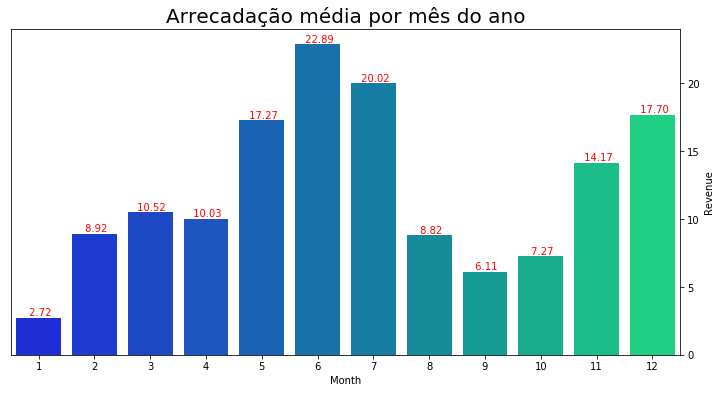

In [30]:
# Plotando resultados
subDim = (2,5)
fig, ax = plt.subplots( figsize=(12, 6) )

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

# Etiquetas individuais
for i, v in enumerate( df_revenue_by_month.month ):
    ax.text( i,
            df_revenue_by_month.iloc[i]["mean"], 
            " {:.2f}".format(df_revenue_by_month.iloc[i]["mean"]), 
            color='red', 
            fontweight='regular',
            va='bottom',
            ha='center',
            )

# Plota as Barras
sns.barplot(
    y="mean",
    x="month",
    data=df_revenue_by_month,
    palette= "winter",
    ax=ax)

# Etiquetas
plt.title("Arrecadação média por mês do ano" , fontsize=20)
plt.xlabel("Month")
plt.ylabel("Revenue" )



### 3) Conclusão

Mesmo considerando as observações das análises parciais, as maiores arrecadações se concentram no meio e no final do ano.

### 4) Como é a relação entre gênero e idioma?

In [31]:
df_genre_movie_info = generateGenreDataFrame( df_movies_metadata )
df_genre_movie_info.head()

,genre,original_language,profit,title,year
0,Animation,en,343554033.0,Toy Story,1995
1,Comedy,en,343554033.0,Toy Story,1995
2,Family,en,343554033.0,Toy Story,1995
3,Adventure,en,197797249.0,Jumanji,1995
4,Fantasy,en,197797249.0,Jumanji,1995


In [32]:
# Criando Pivot Table para usar no heatMap
df_genre_movie_info_grouped = df_genre_movie_info.groupby(  ['genre','original_language'] ).size().reset_index()
df_genre_movie_info_grouped.columns = ['genre','language','count']
df_genre_movie_info_grouped

pivot_genre_movie_info = df_genre_movie_info_grouped.pivot(index='language', columns='genre', values='count' )

# Trocando NaN por 0
pivot_genre_movie_info.fillna(0, inplace=True)

pivot_genre_movie_info.head()

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
language,,,,,,,,,,,,,,,,,,,,
af,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bm,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ca,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cn,15.0,1.0,0.0,5.0,7.0,0.0,7.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
da,0.0,0.0,0.0,3.0,2.0,0.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0


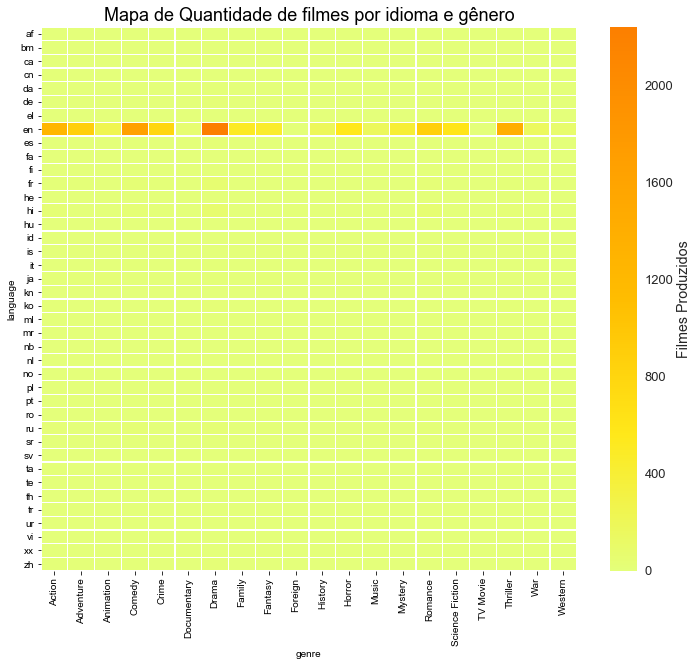

In [33]:
# Configurando Tamanho e Titulos
fig , ax = plt.subplots( figsize = (12,10) )

plt.title( "Mapa de Quantidade de filmes por idioma e gênero" ,fontsize=18)
ttl = ax.title

# Cores a testar: hot , Wistia , gist_heat , viridis , plasma , inferno , magma
sns.set(font_scale=1.3)
sns.heatmap( pivot_genre_movie_info , 
            annot=False , 
            fmt = ".0f" , 
            cmap="Wistia" , 
            linewidths=0.2,
            cbar_kws={'label': 'Filmes Produzidos' },
            ax=ax )

plt.show()


### 4.1) Análise Parcial

Como esperado, filmes em inglês dominam o dataset. Vamos separar em duas visualizações diferentes: Uma para filmes em inglês, outras para outros idiomas.

Text(0,0.5,'Genre')

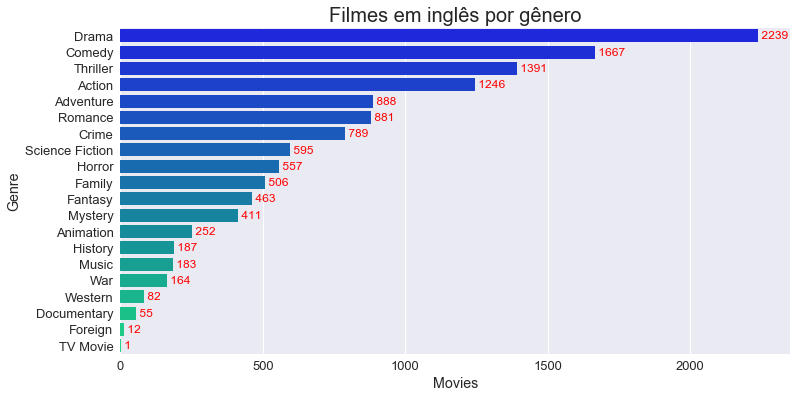

In [34]:
df_genre_movie_info_grouped = df_genre_movie_info[ df_genre_movie_info.original_language == "en" ].groupby(  ['genre','original_language'] ).size().reset_index()
df_genre_movie_info_grouped.columns = ['genre','language','count']
df_genre_movie_info_grouped.sort_values( by="count" , ascending=False, inplace = True )

# Plotando resultados
subDim = (2,5)
fig, ax = plt.subplots( figsize=(12,6) )

# Etiquetas individuais
for i, v in enumerate( df_genre_movie_info_grouped.genre ):
    ax.text( df_genre_movie_info_grouped.iloc[i]["count"],
            i, 
            " {:.0f}".format(df_genre_movie_info_grouped.iloc[i]["count"]), 
            color='red', 
            fontweight='regular',
            va='center',
            ha='left',
            fontsize=12
            )

# Plota as Barras
sns.barplot(
    y="genre",
    x="count",
    order= list(df_genre_movie_info_grouped.genre),
    data=df_genre_movie_info_grouped,
    palette= "winter",
    ax=ax)

# Etiquetas
plt.title("Filmes em inglês por gênero" , fontsize=20)
plt.xlabel("Movies")
plt.ylabel("Genre" )


### 4.2) Análise Parcial
Quando observamos apenas um idioma fica fácil perceber a distribuição de produção de generos.
Vamos agora tentar uma visão mais geral.

In [35]:
# Criando Pivot Table para usar no heatMap
df_genre_movie_info_grouped = df_genre_movie_info[ df_genre_movie_info.original_language != "en" ].groupby(  ['genre','original_language'] ).size().reset_index()
df_genre_movie_info_grouped.columns = ['genre','language','count']

pivot_genre_movie_info = df_genre_movie_info_grouped.pivot(index='language', columns='genre', values='count' )

# Trocando NaN por 0
pivot_genre_movie_info.fillna(0, inplace=True)

pivot_genre_movie_info.head()

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
language,,,,,,,,,,,,,,,,,,,
af,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bm,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ca,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cn,15.0,1.0,0.0,5.0,7.0,0.0,7.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
da,0.0,0.0,0.0,3.0,2.0,0.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0


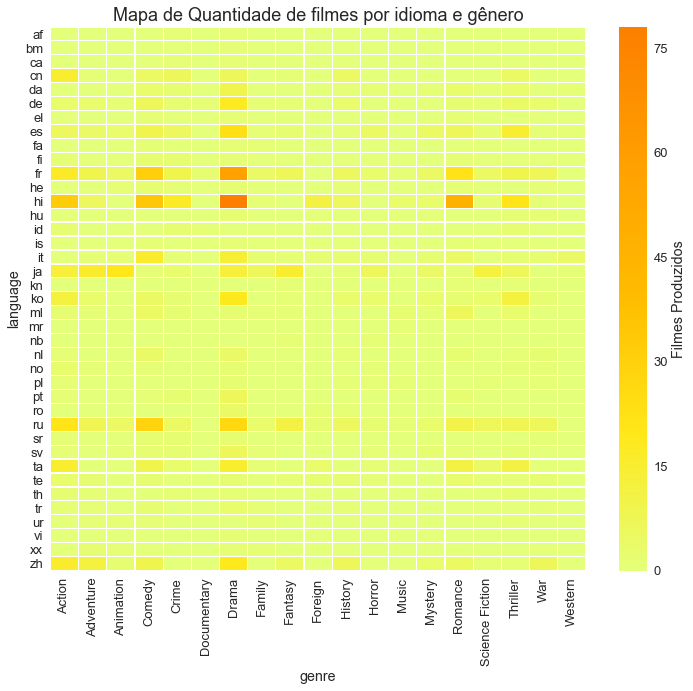

In [36]:
# Configurando Tamanho e Titulos
fig , ax = plt.subplots( figsize = (12,10) )

plt.title( "Mapa de Quantidade de filmes por idioma e gênero" ,fontsize=18)
ttl = ax.title

# Cores a testar: hot , Wistia , gist_heat , viridis , plasma , inferno , magma
sns.set(font_scale=1.3)
sns.heatmap( pivot_genre_movie_info , 
            annot=False , 
            fmt = ".0f" , 
            cmap="Wistia" , 
            linewidths=0.2,
            cbar_kws={'label': 'Filmes Produzidos' },
            ax=ax )

plt.show()


### 4.3) Análise Parcial
Mesmo sem o idioma inglês é dificil perceber a discrepância entre as categorias.

Vamos tentar um radar chat para entender geometricamente o perfil de cada categoria.

In [37]:
# Criando Pivot Table
df_genre_movie_info_grouped = df_genre_movie_info.groupby(  ['genre','original_language'] ).size().reset_index()
df_genre_movie_info_grouped.columns = ['genre','language','count']
df_genre_movie_info_grouped

pivot_genre_movie_info = df_genre_movie_info_grouped.pivot(index='language', columns='genre', values='count' )

# Trocando NaN por 0
pivot_genre_movie_info.fillna(0, inplace=True)

In [38]:
# Abreviando as etiquetas para os plots
abrvLabels = list()
desiredLabelLen = 3
for label in list(pivot_genre_movie_info.columns):
    lastPos = min(desiredLabelLen,len(label))
    abrvLabel = label[0:lastPos]
    if len(label) > desiredLabelLen:
        abrvLabel += "."

    abrvLabels.append(abrvLabel)
    print( abrvLabel + " > " + label )


Act. > Action
Adv. > Adventure
Ani. > Animation
Com. > Comedy
Cri. > Crime
Doc. > Documentary
Dra. > Drama
Fam. > Family
Fan. > Fantasy
For. > Foreign
His. > History
Hor. > Horror
Mus. > Music
Mys. > Mystery
Rom. > Romance
Sci. > Science Fiction
TV . > TV Movie
Thr. > Thriller
War > War
Wes. > Western


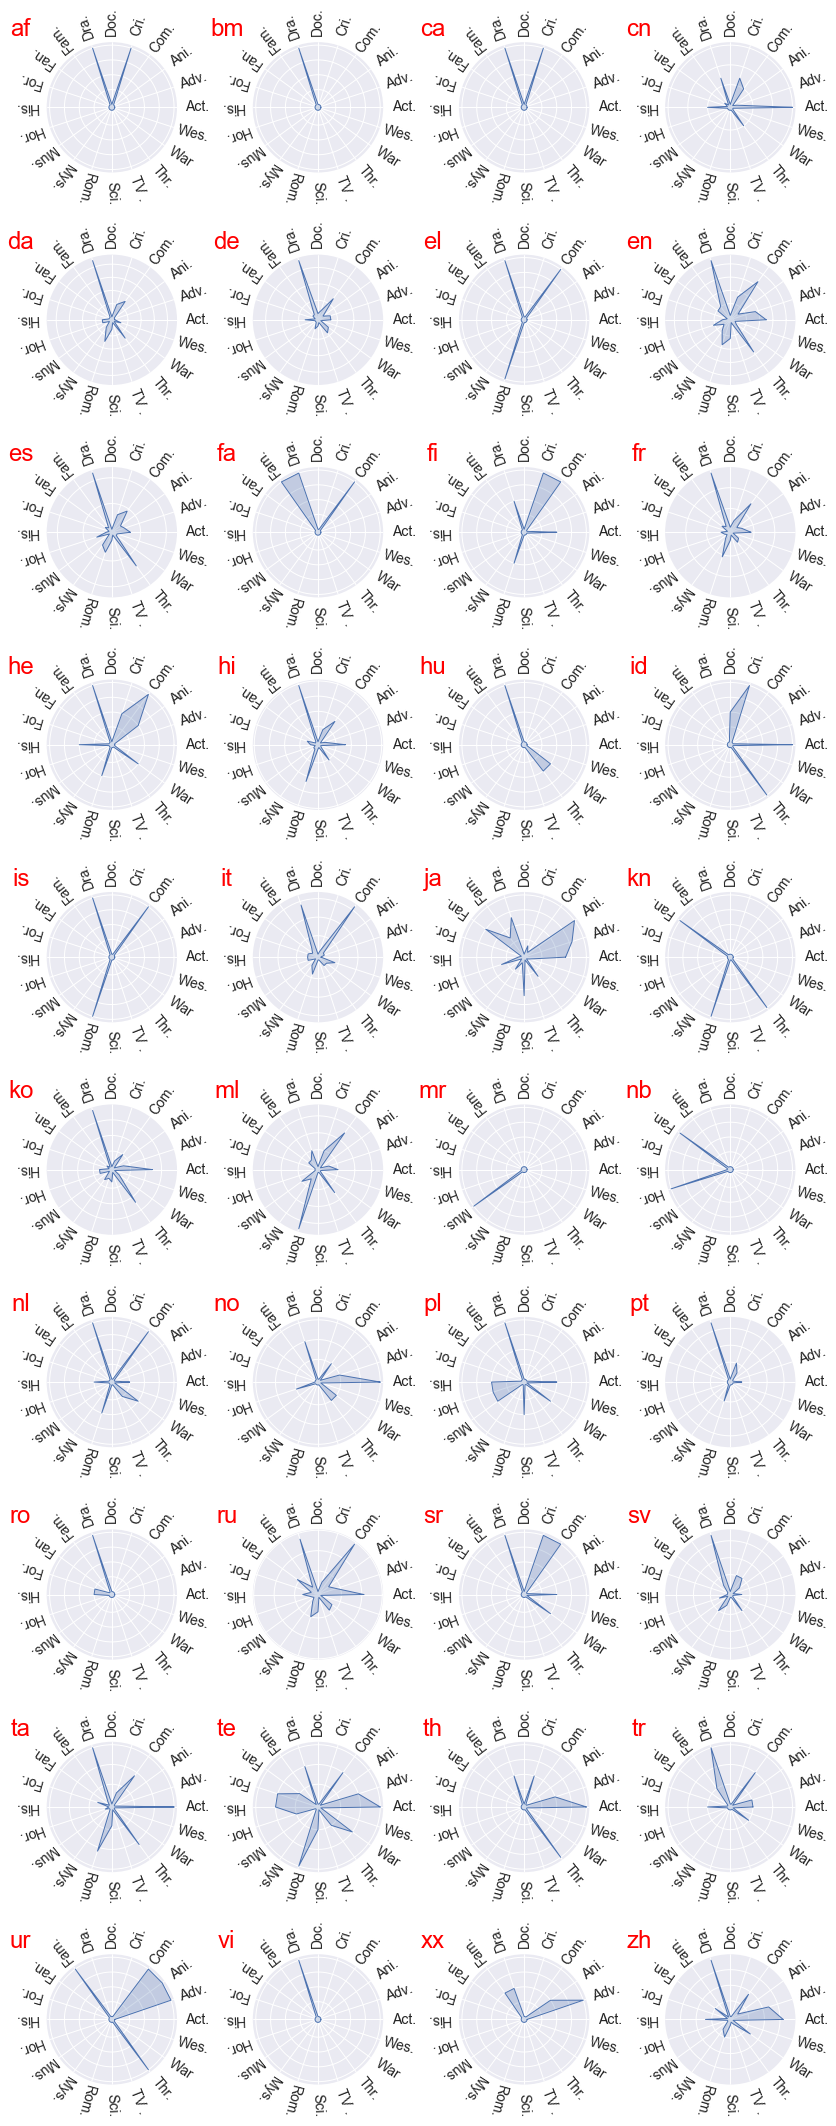

In [39]:
# Graph Data
plots = len(pivot_genre_movie_info.index)

cols = 4
rows = int(plots/cols) + 1

fig = plt.figure(figsize=(cols*3,rows*3))

for i in range( plots ):
    labels=np.array( abrvLabels )
    stats=pivot_genre_movie_info.iloc[i].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    # Plot
    ax = plt.subplot(rows ,cols , i+1, polar=True)

    ax.plot(angles, stats, 'o-', linewidth=1, markersize = 0 )
    ax.fill(angles, stats, alpha=0.25)

    ax.set_thetagrids(angles * 180/np.pi, labels)

    ax.set_title(pivot_genre_movie_info.index[i] , fontsize = 24, color="red" )
    ax.title.set_position([-0.2, 1])

    ax.set_yticklabels([])

    # Arrumando as etiquetas
    labels = []
    for label, angle in zip(ax.get_xticklabels(), angles):
        x,y = label.get_position()
        x = angle
        y = y - 0.1
        lab = ax.text(x,y, label.get_text(), 
                      transform=label.get_transform(),
                      ha= label.get_ha(),
                      va= label.get_va(),
                      fontsize = 14,
                     )
        lab.set_rotation(angle * 58)
        labels.append(lab)

    ax.set_xticklabels([])

    ax.grid(True)

fig.tight_layout( pad=2.5 )

### 4) Conclusão

Pelo RadarChart é possível perceber que o perfil de produção de cada idioma é diferente.

Mais tarde, na etapa de clusterização, vamos tentar agrupar esses dados para entender quais idiomas são parecidos entre sí, considerando os generos dos filmes.


### 5) Existe uma relação entre orçamento e resposta ( avalição ) da população?

In [50]:
# Um dataframe apenas com os dados que interessam
df_budget_vote = df_movies_metadata[ ["budget" , "vote_average" ] ].copy()
df_budget_vote = df_budget_vote[ df_budget_vote.budget > 0 ]

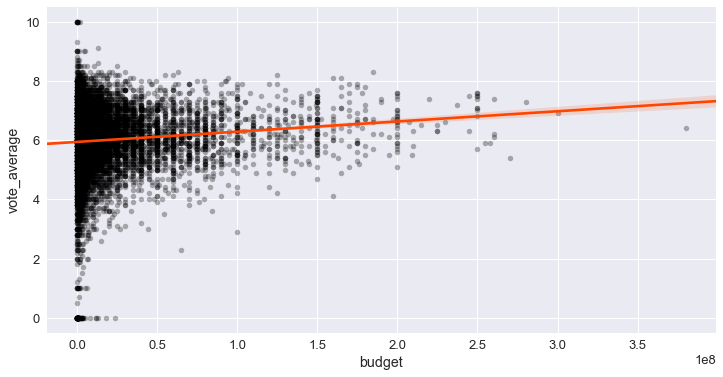

In [65]:
# Plot 1
plt.figure(figsize=(12,6))
sns.regplot(
    x=df_budget_vote["budget"],
    y=df_budget_vote["vote_average"],
    scatter_kws={"color": "black" , 'alpha':0.3, 's':30 },
    line_kws={"color": "orangered"},
    fit_reg=True)


plt.show()

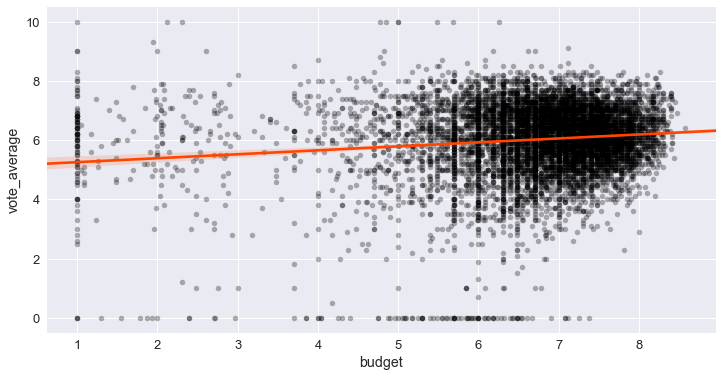

In [66]:
df_budget_vote["budget"] = df_budget_vote["budget"].apply(apply_toLog )
plt.figure(figsize=(12,6))
sns.regplot(
    x=df_budget_vote["budget"],
    y=df_budget_vote["vote_average"],
    scatter_kws={"color": "black" , 'alpha':0.3, 's':30 },
    line_kws={"color": "orangered"},
    fit_reg=True)
plt.show()

### 5) Conclusão

Pela regressão existe uma leve inclinação para notas mais altas para filmes mais caros.
Porém a distribuição está muito espalhada para considerar essa relação como forte.